<a href="https://colab.research.google.com/github/MiguelAngelDLA/Notebooks_TallerIA_AD2024/blob/main/Descenso_Gradiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descenso de Gradiente

El **descenso de gradiente** es un algoritmo de optimización que se utiliza para minimizar funciones. En el aprendizaje automático, es comúnmente utilizado para minimizar una función de costo (también conocida como función de pérdida), lo que nos permite encontrar los mejores parámetros para un modelo de aprendizaje.

##Definición de gradiente

El **gradiente** es un vector que nos indica la dirección y magnitud de la mayor tasa de cambio de una función escalar en un punto específico. En términos más simples, el gradiente nos muestra en qué dirección deberíamos movernos en el espacio para aumentar o disminuir más rápidamente el valor de la función.

Matemáticamente, si tenemos una función de varias variables $f(x_1, x_2, ..., x_n)$, el gradiente de $f$, denotado como $\nabla f$, es un vector cuyos componentes son las derivadas parciales de la función con respecto a cada variable.

Es decir,

$$\nabla f = \left(\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, ..., \frac{\partial f}{\partial x_n}\right)$$

Donde cada componente del vector es la derivada de $f$ con respecto a una de las variables.

### Intuición del Gradiente

Imagina que estás en una colina y quieres llegar a la cima lo más rápido posible. El gradiente te diría en qué dirección debes caminar para subir más rápido. De manera similar, en un problema de optimización, el gradiente de una función de costo indica la dirección en la que deberíamos ajustar los parámetros para reducir el costo.

Vamos a ilustrar cómo se calcula el gradiente de una función simple y graficarlo.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math

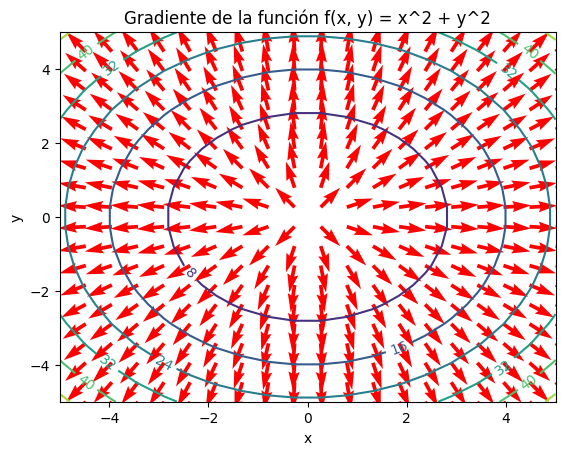

In [2]:
def f(x, y):
    return x**2 + y**2

def grad_f(x, y):
    df_dx = 2 * x
    df_dy = 2 * y
    return np.array([df_dx, df_dy])

x_vals = np.linspace(-5, 5, 20)
y_vals = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)

for i in range(len(x_vals)): #Se calculan los vectores gradientes

    for j in range(len(y_vals)):
        grad = grad_f(x_vals[i], y_vals[j])
        ax.quiver(x_vals[i], y_vals[j], grad[0], grad[1], color='red')

plt.title('Gradiente de la función f(x, y) = x^2 + y^2')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

En este ejemplo, hemos definido una función simple de dos variables $f(x, y) = x^2 + y^2$ y calculado su gradiente. La gráfica muestra las líneas de nivel de la función y los vectores de gradiente, que indican la dirección de mayor incremento.


## Definicion
El descenso de gradiente está descrito normalmente como:

$$\begin{align*} \text{repitase}&\text{ hasta la convergencia:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$

donde, los parametros $w$, $b$ son actualizados de manera simultanea.  

Por lo tanto, el descenso de gradiente se define de manera formal como:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$


## Definición de la función de costo

La función de costo evalúa qué tan bien un modelo predice el valor esperado. Para un problema de regresión lineal, la función de costo (J) es la media de los errores al cuadrado de las predicciones.

$$J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2$$

Donde:
- $h_\theta(x^{(i)})$ es la predicción de nuestro modelo.
- $y^{(i)}$ es el valor real.
- $m$ es el número total de ejemplos.

In [5]:
def compute_cost(x, y, w, b):

    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

## Intuición del Descenso de Gradiente

El objetivo del descenso de gradiente es minimizar la función de costo. Comienza con un valor inicial para los parámetros y luego ajusta estos valores iterativamente en la dirección en la que la función de costo disminuye más rápidamente, es decir, en la dirección del gradiente negativo.

La actualización de los parámetros $\theta_j$ se realiza mediante la siguiente fórmula:

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)$$

Donde $\alpha$ es la tasa de aprendizaje, que controla qué tan grandes son los pasos que damos en la dirección del gradiente.

In [3]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [13]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w , b)

        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        if i<100000:
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteración {i:4}: Costo {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history

In [6]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

In [14]:
w_init = 0
b_init = 0

iterations = 10000
tmp_alpha = 1.0e-2

w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) encontrado por el descenso de gradiente: ({w_final:8.4f},{b_final:8.4f})")

Iteración    0: Costo 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteración 1000: Costo 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteración 2000: Costo 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteración 3000: Costo 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteración 4000: Costo 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteración 5000: Costo 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteración 6000: Costo 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteración 7000: Costo 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteración 8000: Costo 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteración 9000: Costo 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.

En este ejemplo, generamos un conjunto de datos sintéticos para un problema de regresión lineal y utilizamos el descenso de gradiente para encontrar los parámetros óptimos $\theta$. La gráfica muestra cómo disminuye el costo a medida que avanzan las iteraciones.

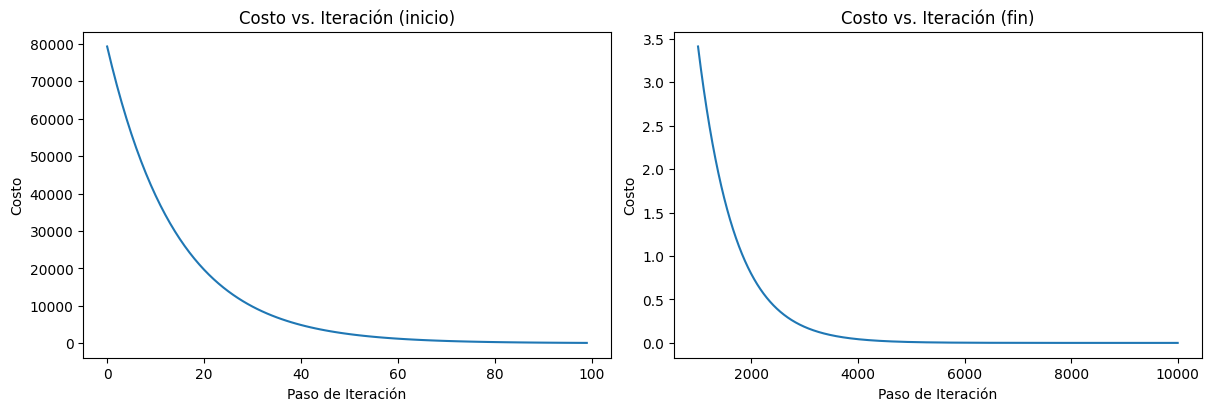

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Costo vs. Iteración (inicio)");  ax2.set_title("Costo vs. Iteración (fin)")
ax1.set_ylabel('Costo')            ;  ax2.set_ylabel('Costo')
ax1.set_xlabel('Paso de Iteración')  ;  ax2.set_xlabel('Paso de Iteración')
plt.show()